<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [27]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [28]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





The shape of the image is : (100, 100, 3)
The shape of the img_single_channel is : (100, 100)


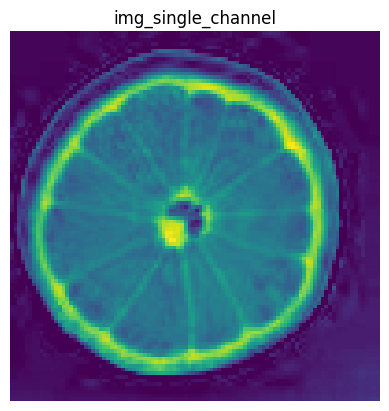

In [29]:
# image.shape gives the rows, columns , channel(3 for RGB)
print("The shape of the image is :", image.shape)
# plt.imshow(image)
# plt.axis('off')
# plt.show()
# print(image.shape)

img_single_channel = image[:, :, 2]
print("The shape of the img_single_channel is :",img_single_channel.shape)
plt.imshow(img_single_channel)
plt.title("img_single_channel")
plt.axis('off')
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

The shape of the average of all three color channel is : (100, 100)


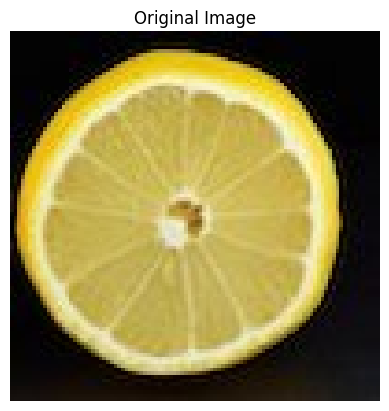

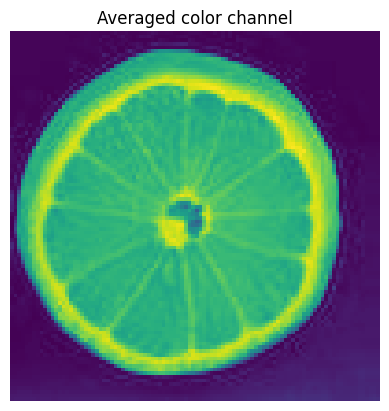

In [30]:
img_average_channel = np.mean(image, axis=(2))
print("The shape of the average of all three color channel is :",img_average_channel.shape)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()
plt.imshow(img_average_channel)
plt.title("Averaged color channel")
plt.axis('off')
plt.show()

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

Identity matrix is a special type of square matrix.An identity matrix, all the elements along the main diagonal (from the top left to the bottom right) are equal to 1, 
while all other elements outside the main diagonal are equal to 0. 
Consider A as Identity matrix A[i][i] = 1 for i = 1,2,3, ..... n
A[i][j] = 0 where i != j

Multiplying any matrix with an identity matrix yeilds in Original matrix itself. It acts like neutral component.

In [31]:
identity_matrix = np.identity(*img_average_channel[0].shape)
identity_matrix.shape
random_value = np.random.randint(0, 100)
row_row = identity_matrix[random_value,:]
print("Random row :\n",row_row)

Random row :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [32]:
n_rows = img_average_channel.shape[0]
rows = np.arange(0,n_rows)
np.random.shuffle(rows)
print(rows)

[26 47 90 10 66 86 74 57 38 17 81 13 84 53 16 43 80 94 60 62 61 36 91 28
 99 29 59 37  6 33 30 83  3 32 70  4 87 11 72 55 93 21 41 12  7 96 51 98
 63  0 15 45 82  5 71 56 42 49 65 92 24 78 22 88 69 20 54 79 75 18  9  1
 52 58 50 97 14  2 40 19 64 68 34 85 77 95 67 23 27 44 48  8 73 76 89 46
 31 25 39 35]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [33]:
T = identity_matrix[rows]
print("The shape of identity_matirx is :",T.shape)

The shape of identity_matirx is : (100, 100)


Shuffling the rows of the Identity matrix but preserving Identity matrix property. Its more like introducing noise when multiplied to another matrix becuase of the random rows.

## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

The shape of the transformed image is : (100, 100)


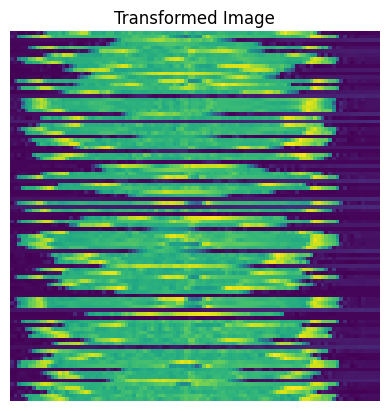

In [34]:
transformed_image = T @ img_average_channel
print("The shape of the transformed image is :",transformed_image.shape)
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.axis('off')
plt.show()


Shuffled rows elements are mutlipled with the image and the rows in the image has been shuffled making to look like noise has been introduced, basicallly the rows are shuffled with the help of identity matrix

Image's rows are shuffled and looks like noise has been introduced.
Each dot product involving a row from the first matrix and a column from the second matrix essentially signifies a weighted summation of values.
Each dot product calculates how the original image's pixels are combined and modified according to secodn matrix given, ultimately resulting in a transformed version of the image.


## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

In [35]:
determinant_T = np.linalg.det(T)
print("Since the determinant is non-zero it is invertibel and the determinnat is :",determinant_T)

Since the determinant is non-zero it is invertibel and the determinnat is : 1.0


An invertible matrix has a nonzero determinant, so T has nonzero determiant

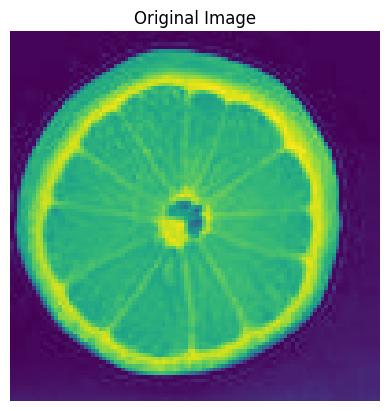

In [36]:

Tinv = np.linalg.inv(T)
# print(Tinv)
Tinv = np.linalg.inv(T)
original_image = Tinv @transformed_image 
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')
plt.show()

 The orginial image is not the "The image which was defined with name "image" is because we are using the image called img_average_channel to do the transformation


## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


The shape of identity_matrix is : (100, 100)
The shape of shuffled T matrix with colums is : (100, 100)
The shape of transformed image : (100, 100)


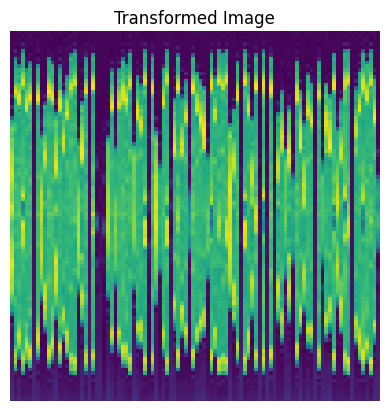

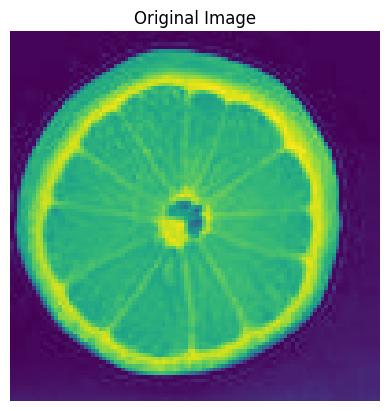

In [37]:
n_cols = image.shape[1]
cols = np.arange(0,n_cols)
np.random.shuffle(cols)
identity_matrix = np.identity(*img_average_channel[1].shape)
print("The shape of identity_matrix is :",identity_matrix.shape)
T = identity_matrix[:,cols]
print("The shape of shuffled T matrix with colums is :",T.shape)
transformed_image = img_average_channel  @ T
print("The shape of transformed image :",transformed_image.shape)
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.axis('off')
plt.show()


TinvC = np.linalg.inv(T)

# print(reversing)
original_image = transformed_image @ TinvC
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')
plt.show()


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

Sanity check the shape of identity matirx : (100, 100)


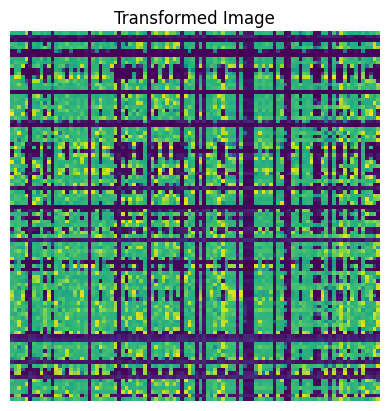

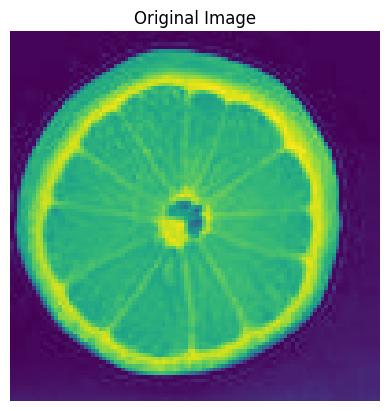

In [38]:
identity_matrix = np.identity(*img_average_channel[0].shape)
print("Sanity check the shape of identity matirx :",identity_matrix.shape)
n_rows = img_average_channel.shape[0]
n_colss = img_average_channel.shape[0]
rows = np.arange(0,n_rows)
cols = np.arange(0,n_cols)
np.random.shuffle(rows)
np.random.shuffle(cols)


T_rows = identity_matrix[rows]
T_cols = identity_matrix[:,cols]
# print(T)
transformed_image = T_rows  @ img_average_channel @ T_cols
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.axis('off')
plt.show()

T_r_inv = np.linalg.inv(T_rows)
T_c_inv = np.linalg.inv(T_cols)

orginal_image = T_r_inv @ transformed_image @ T_c_inv
plt.imshow(orginal_image)
plt.title("Original Image")
plt.axis('off')
plt.show()


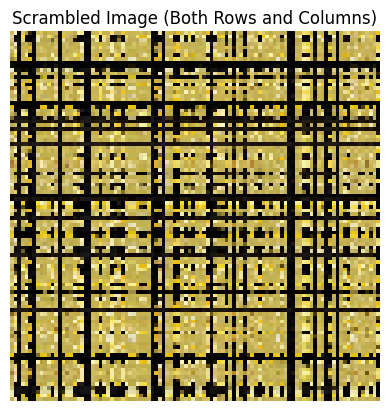

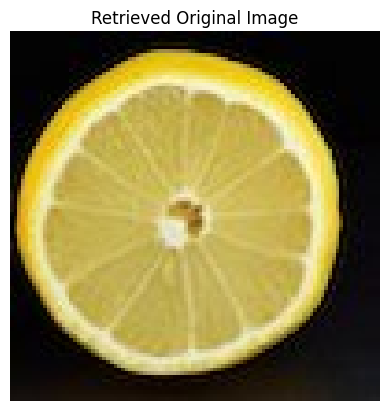

In [39]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image = np.array(Image.open('../../Images/lemon.jpeg'))
rows, cols, channels = image.shape
identity_rows = np.identity(rows)
identity_cols = np.identity(cols)
row_indices = np.arange(rows)
col_indices = np.arange(cols)

np.random.shuffle(row_indices)
np.random.shuffle(col_indices)
T_rows = identity_rows[row_indices, :]
T_cols = identity_cols[:, col_indices]

shuffel_image = np.zeros_like(image)
for channel in range(channels):
    shuffel_image[:, :, channel] = T_rows @ image[:, :, channel] @ T_cols
plt.imshow(shuffel_image)
plt.title("Scrambled Image (Both Rows and Columns)")
plt.axis('off')
plt.show()
T_rinv = np.linalg.inv(T_rows)
T_cinv = np.linalg.inv(T_cols)
recovered_image = np.zeros_like(image)
for channel in range(channels):
    recovered_image[:, :, channel] = T_rinv @ shuffel_image[:, :, channel] @ T_cinv
plt.imshow(recovered_image)
plt.title("Retrieved Original Image")
plt.axis('off')
plt.show()